In [1]:
import matplotlib as mpl
mpl.rcParams.update({
    "pdf.fonttype": 42,          # embed TrueType as Type 42, avoids Type 3
    "ps.fonttype": 42,           # for EPS if you export it too
    "pdf.use14corefonts": False, # do not force the 14 base fonts
    "text.usetex": False,        # render with Matplotlib
    "pdf.compression":9
})

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [4]:
df1 = pd.read_csv('../data/masterfile-study1-a.csv')
df1

,Simulation Name,PID,eventName,eventDateTime,isPartOfCompromise,order,scenario,infoRequested,emailSubject,MANIPULATION,Group,country,age_bin,read,EventDate,EventTime,EventDay,EventTimeBin,EventHour,EventTimeBin_OneHour
0,DSPC3,97,MessageRead,2023-06-25 13:57:00,False,3,Y06,S,WSU Hiring,PC * DS,A,CG Democratic Republic of Congo,35 - 44,1,2023-06-25,13:57:00,Sunday,Afternoon,13,13:00–13:59
1,MSC3,97,MessageRead,2023-06-25 13:56:00,False,3,G06,A,FINAL NOTICE: Rent,C * MS,A,CG Democratic Republic of Congo,35 - 44,1,2023-06-25,13:56:00,Sunday,Afternoon,13,13:00–13:59
2,DSC2,97,MessageRead,2023-06-25 13:56:00,False,2,P10,X,Lost Package,C * DS,A,CG Democratic Republic of Congo,35 - 44,1,2023-06-25,13:56:00,Sunday,Afternoon,13,13:00–13:59
3,MSPC3,86,MessageDeleted,2023-06-10 00:23:00,False,3,B03,A,OVERTIME BONUS,PC * MS,A,CG Democratic Republic of Congo,25 - 34,1,2023-06-10,00:23:00,Saturday,Night,0,00:00–00:59
4,MSPC1,86,MessageDeleted,2023-06-10 00:23:00,False,1,B07,S,HIRING UPDATE,PC * MS,A,CG Democratic Republic of Congo,25 - 34,1,2023-06-10,00:23:00,Saturday,Night,0,00:00–00:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,MSC1,101,SuccessfullyDeliveredEmail,2023-05-27 15:12:00,False,1,G07,B,UPDATE: Your Award,C * MS,A,SS South Sudan,35 - 44,1,2023-05-27,15:12:00,Saturday,Afternoon,15,15:00–15:59
324,MSC1,102,SuccessfullyDeliveredEmail,2023-05-27 15:12:00,False,1,G07,B,UPDATE: Your Award,C * MS,A,CG Democratic Republic of Congo,35 - 44,1,2023-05-27,15:12:00,Saturday,Afternoon,15,15:00–15:59
325,MSC1,103,SuccessfullyDeliveredEmail,2023-05-27 15:12:00,False,1,G07,B,UPDATE: Your Award,C * MS,A,CG Democratic Republic of Congo,25 - 34,3,2023-05-27,15:12:00,Saturday,Afternoon,15,15:00–15:59
326,MSC1,90,SuccessfullyDeliveredEmail,2023-05-27 15:12:00,False,1,G07,B,UPDATE: Your Award,C * MS,A,BY Burundi,25 - 34,1,2023-05-27,15:12:00,Saturday,Afternoon,15,15:00–15:59


In [5]:
df2 = pd.read_csv('../data/masterfile-study2-bc.csv')
df2

,Simulation Name,PID,eventName,eventDateTime,isPartOfCompromise,order,scenario,infoRequested,emailSubject,MANIPULATION,Group,country,age_bin,read,EventDate,EventTime,EventDay,EventTimeBin,EventHour,EventTimeBin_OneHour
0,EWeek 4 - B01 - S,1,MessageRead,2024-09-25 09:32:07,False,4,B01,S,RESUME: Update Needed,PC * MS,C,US United States,18 - 24,5,2024-09-25,09:32:07,Wednesday,Morning,9,09:00–09:59
1,EWeek 4 - B01 - S,1,MessageDeleted,2024-09-25 09:32:07,False,4,B01,S,RESUME: Update Needed,PC * MS,C,US United States,18 - 24,5,2024-09-25,09:32:07,Wednesday,Morning,9,09:00–09:59
2,EWeek 4 - B01 - S,2,SuccessfullyDeliveredEmail,2024-09-23 10:10:33,False,4,B01,S,RESUME: Update Needed,PC * MS,C,US United States,18 - 24,5,2024-09-23,10:10:33,Monday,Morning,10,10:00–10:59
3,EWeek 4 - B01 - S,1,SuccessfullyDeliveredEmail,2024-09-23 10:10:32,False,4,B01,S,RESUME: Update Needed,PC * MS,C,US United States,18 - 24,5,2024-09-23,10:10:32,Monday,Morning,10,10:00–10:59
4,EWeek 4 - B01 - S,3,SuccessfullyDeliveredEmail,2024-09-23 10:10:31,False,4,B01,S,RESUME: Update Needed,PC * MS,C,US United States,35 - 44,5,2024-09-23,10:10:31,Monday,Morning,10,10:00–10:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,NWeek 2 - Y12 - B,212,SuccessfullyDeliveredEmail,2024-03-27 16:01:00,False,2,Y12,B,Update Your Information,PC * DS,B,CG Democratic Republic of Congo,18 - 24,4,2024-03-27,16:01:00,Wednesday,Afternoon,16,16:00–16:59
2246,NWeek 1 - Y12 - B,207,MessageRead,2024-03-26 19:21:00,False,1,Y12,B,Update Your Information,PC * DS,B,KE Kenya,35 - 44,4,2024-03-26,19:21:00,Tuesday,Evening,19,19:00–19:59
2247,NWeek 1 - Y12 - B,207,MessageDeleted,2024-03-26 19:21:00,False,1,Y12,B,Update Your Information,PC * DS,B,KE Kenya,35 - 44,4,2024-03-26,19:21:00,Tuesday,Evening,19,19:00–19:59
2248,NWeek 1 - Y12 - B,207,SuccessfullyDeliveredEmail,2024-03-21 21:04:00,False,1,Y12,B,Update Your Information,PC * DS,B,KE Kenya,35 - 44,4,2024-03-21,21:04:00,Thursday,Night,21,21:00–21:59


In [6]:
df = pd.concat([df1,df2])
df.Group.unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
df.country.unique()

array(['CG Democratic Republic of Congo', 'MW Malawi', 'SS South Sudan',
       'BY Burundi', 'US United States', 'TZ Tanzania', 'KE Kenya',
       'RW Rwanda', 'UG Uganda'], dtype=object)

#    # Both Group A and groups B and C

In [8]:
df.pivot_table(
    index=['EventDay','Group'],
    columns='eventName',
    aggfunc='size',
    fill_value=0
).reset_index()

eventName,EventDay,Group,CredSupplied,EmailLinkClicked,MessageDeleted,MessageForwarded,MessageRead,MessageReplied,OutOfOffice,ReportedEmail,SuccessfullyDeliveredEmail
0,Friday,A,0,1,2,0,24,2,0,0,38
1,Friday,B,0,1,4,0,11,0,0,0,0
2,Friday,C,0,0,8,0,13,1,0,1,0
3,Monday,A,0,0,0,0,1,1,0,0,19
4,Monday,B,5,5,6,0,22,0,0,0,46
5,Monday,C,5,13,44,0,87,5,0,5,184
6,Saturday,A,0,0,10,0,5,0,0,0,38
7,Saturday,B,0,0,1,0,3,0,0,0,0
8,Saturday,C,2,3,5,0,9,0,0,0,0
9,Sunday,A,0,2,0,0,18,3,0,0,38


In [9]:
weekday_counts = df.groupby(['EventDay', 'eventName']).size().unstack(fill_value=0).reset_index()
print(weekday_counts)

eventName   EventDay  CredSupplied  EmailLinkClicked  MessageDeleted  \
0             Friday             0                 2              14   
1             Monday            10                18              50   
2           Saturday             2                 3              16   
3             Sunday             0                 3               3   
4           Thursday             9                26              49   
5            Tuesday             7                25              45   
6          Wednesday            12                31              52   

eventName  MessageForwarded  MessageRead  MessageReplied  OutOfOffice  \
0                         0           48               3            0   
1                         0          110               6            0   
2                         0           17               0            0   
3                         0           26               3            0   
4                         1          153               8  

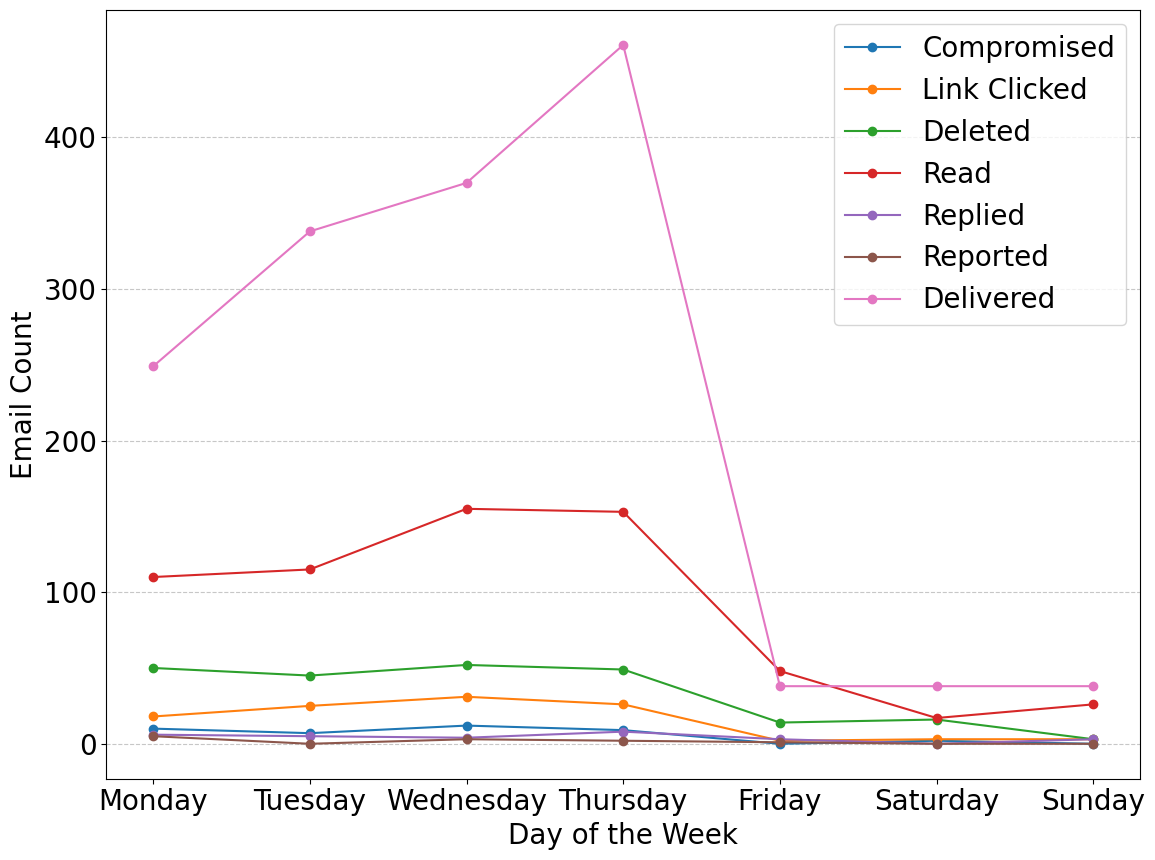

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['EventDay'] = pd.Categorical(weekday_counts['EventDay'], categories=day_order, ordered=True)

# Group by EventDay and sum all metrics
metrics = ['CredSupplied', 'EmailLinkClicked', 'MessageDeleted', 
           'MessageRead', 'MessageReplied', 'ReportedEmail', 'SuccessfullyDeliveredEmail']

df_grouped = weekday_counts.groupby('EventDay')[metrics].sum().reset_index()
df_grouped = df_grouped.sort_values('EventDay')


legend_labels = [
    'Compromised', 
    'Link Clicked', 
    'Deleted', 
    'Read', 
    'Replied', 
    'Reported', 
    'Delivered'
]

plt.figure(figsize=(12, 9))
x = df_grouped['EventDay'].to_numpy()

for metric, label in zip(metrics, legend_labels):
    y = df_grouped[metric].to_numpy()
    plt.plot(x, y, marker='o', label=label)

plt.xlabel('Day of the Week')
plt.ylabel('Email Count')
#plt.title('Metrics by Day of the Week')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("../figures/dayofweek.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

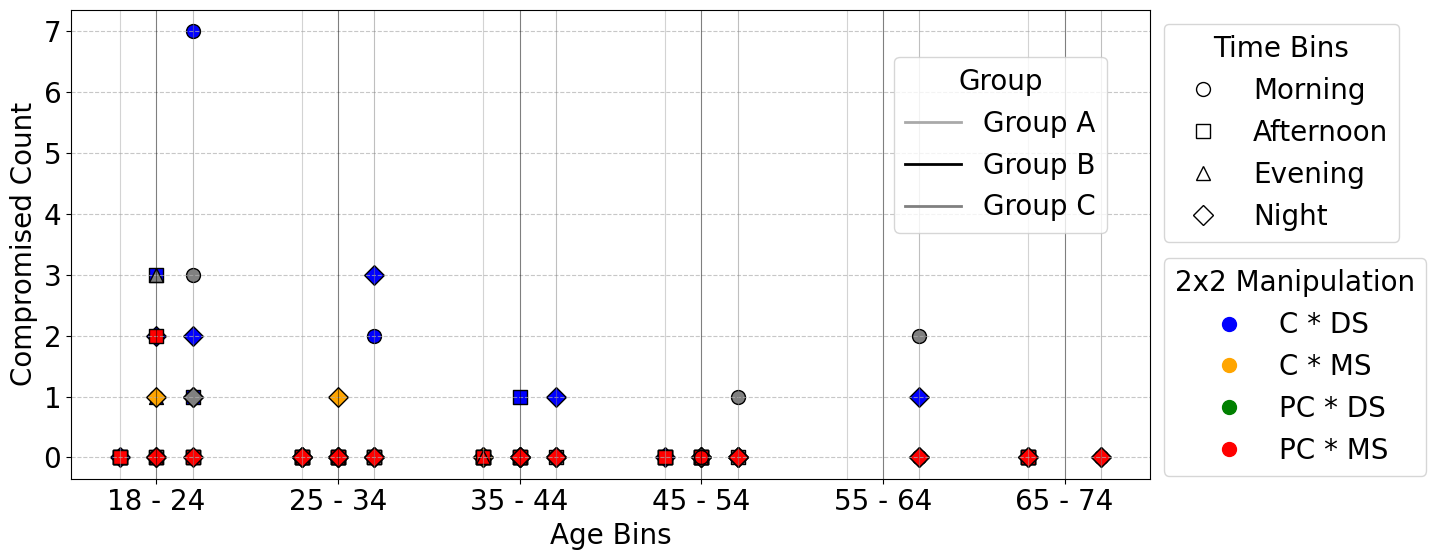

    Group  age_bin MANIPULATION EventTimeBin  CredSupplied
0       A  18 - 24       C * DS    Afternoon             0
1       A  18 - 24       C * DS      Evening             0
2       A  18 - 24       C * DS        Night             0
3       A  18 - 24       C * MS    Afternoon             0
4       A  18 - 24     PC * DS     Afternoon             0
..    ...      ...          ...          ...           ...
154     C  55 - 64      PC * MS        Night             0
155     C  65 - 74       C * DS        Night             0
156     C  65 - 74       C * MS      Morning             0
157     C  65 - 74     PC * DS       Morning             0
158     C  65 - 74      PC * MS        Night             0

[159 rows x 5 columns]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 20})

# Define marker styles for EventTimeBin
marker_styles = {
    'Morning': 'o',    # Circle
    'Afternoon': 's',  # Square
    'Evening': '^',    # Triangle
    'Night': 'D'       # Diamond
}

# Define color styles for MANIPULATION
color_styles = {
    'C * DS': 'blue',
    'C * MS': 'orange',
    'PC * DS': 'green',
    'PC * MS': 'red'
}

amc_counts = df.pivot_table(
    index=['age_bin','MANIPULATION','EventTimeBin','Group'],
    columns='eventName',
    #columns='eventName',
    aggfunc='size',
    fill_value=0
).reset_index()

dfg = amc_counts.groupby(['Group','age_bin','MANIPULATION','EventTimeBin'])['CredSupplied'].sum().reset_index()

# Define unique age_bins and groups
age_bins = sorted(dfg['age_bin'].unique())
groups = sorted(dfg['Group'].unique())
group_line_colors = {
    'A': 'darkgray',
    'B': 'black',
    'C': 'gray'
    
}
offsets = np.linspace(-0.2, 0.2, len(groups))  # horizontal offsets per group

plt.figure(figsize=(12, 6))

# Add vertical lines for each group at each age bin
for idx, age_bin in enumerate(age_bins):
    for i, group in enumerate(groups):
        x_pos = idx + offsets[i]
        plt.axvline(x=x_pos, color=group_line_colors[group], linestyle='-', linewidth=0.8, alpha=0.5)

# Plot points: each row in dfg is plotted
for i, group in enumerate(groups):
    subset_group = dfg[dfg['Group'] == group]
    for _, row in subset_group.iterrows():
        x_pos = age_bins.index(row['age_bin']) + offsets[i]
        y_val = row['CredSupplied']
        marker = marker_styles.get(row['EventTimeBin'], 'o')
        color = color_styles.get(row['MANIPULATION'], 'gray')
        plt.scatter(
            x_pos,
            y_val,
            marker=marker,
            s=100,
            color=color,
            edgecolor='black'
        )

# X-axis labels
plt.xticks(ticks=range(len(age_bins)), labels=age_bins)
plt.xlabel('Age Bins')
plt.ylabel('Compromised Count')
#plt.title('CredSupplied by Age Bin, Group (lines), EventTimeBin (symbol), and MANIPULATION (color)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create custom legends
# Legend for EventTimeBin (shapes)
event_legend = [
    Line2D([0], [0], marker=marker, color='black', linestyle='',
           markersize=10, label=time_bin, markerfacecolor='white')
    for time_bin, marker in marker_styles.items()
]

# Legend for MANIPULATION (colors)
manip_legend = [
    Line2D([0], [0], marker='o', color=color, linestyle='',
           markersize=10, label=manip)
    for manip, color in color_styles.items()
]

# Legend for Groups (lines)
group_legend = [
    Line2D([0], [0], color=color, linewidth=2, label=f'Group {group}')
    for group, color in group_line_colors.items()
]

legend1 = plt.legend(handles=event_legend, title='Time Bins', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=manip_legend, title='2x2 Manipulation', bbox_to_anchor=(1, 0.5), loc='upper left')
plt.gca().add_artist(legend2)
plt.legend(handles=group_legend, title='Group', bbox_to_anchor=(0.75, .93), loc='upper left')

plt.tight_layout()

plt.savefig("../figures/agetime.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print(dfg)

In [12]:
mdf = df.pivot_table(
    index=['MANIPULATION','Group'],
    columns='eventName',
    aggfunc='size',
    fill_value=0
).reset_index()
mdf

eventName,MANIPULATION,Group,CredSupplied,EmailLinkClicked,MessageDeleted,MessageForwarded,MessageRead,MessageReplied,OutOfOffice,ReportedEmail,SuccessfullyDeliveredEmail
0,C * DS,A,0,2,3,0,18,2,0,0,57
1,C * DS,B,7,10,9,0,38,0,0,0,142
2,C * DS,C,17,30,30,3,115,4,0,1,184
3,C * MS,A,0,1,4,0,17,3,0,0,57
4,C * MS,B,3,11,12,0,34,2,0,1,142
5,C * MS,C,1,11,49,0,94,4,0,2,184
6,PC * DS,A,0,1,3,0,18,2,0,0,57
7,PC * DS,B,3,10,11,0,38,0,0,0,142
8,PC * DS,C,7,20,39,1,99,5,1,3,184
9,PC * MS,A,0,0,3,0,20,3,0,0,57


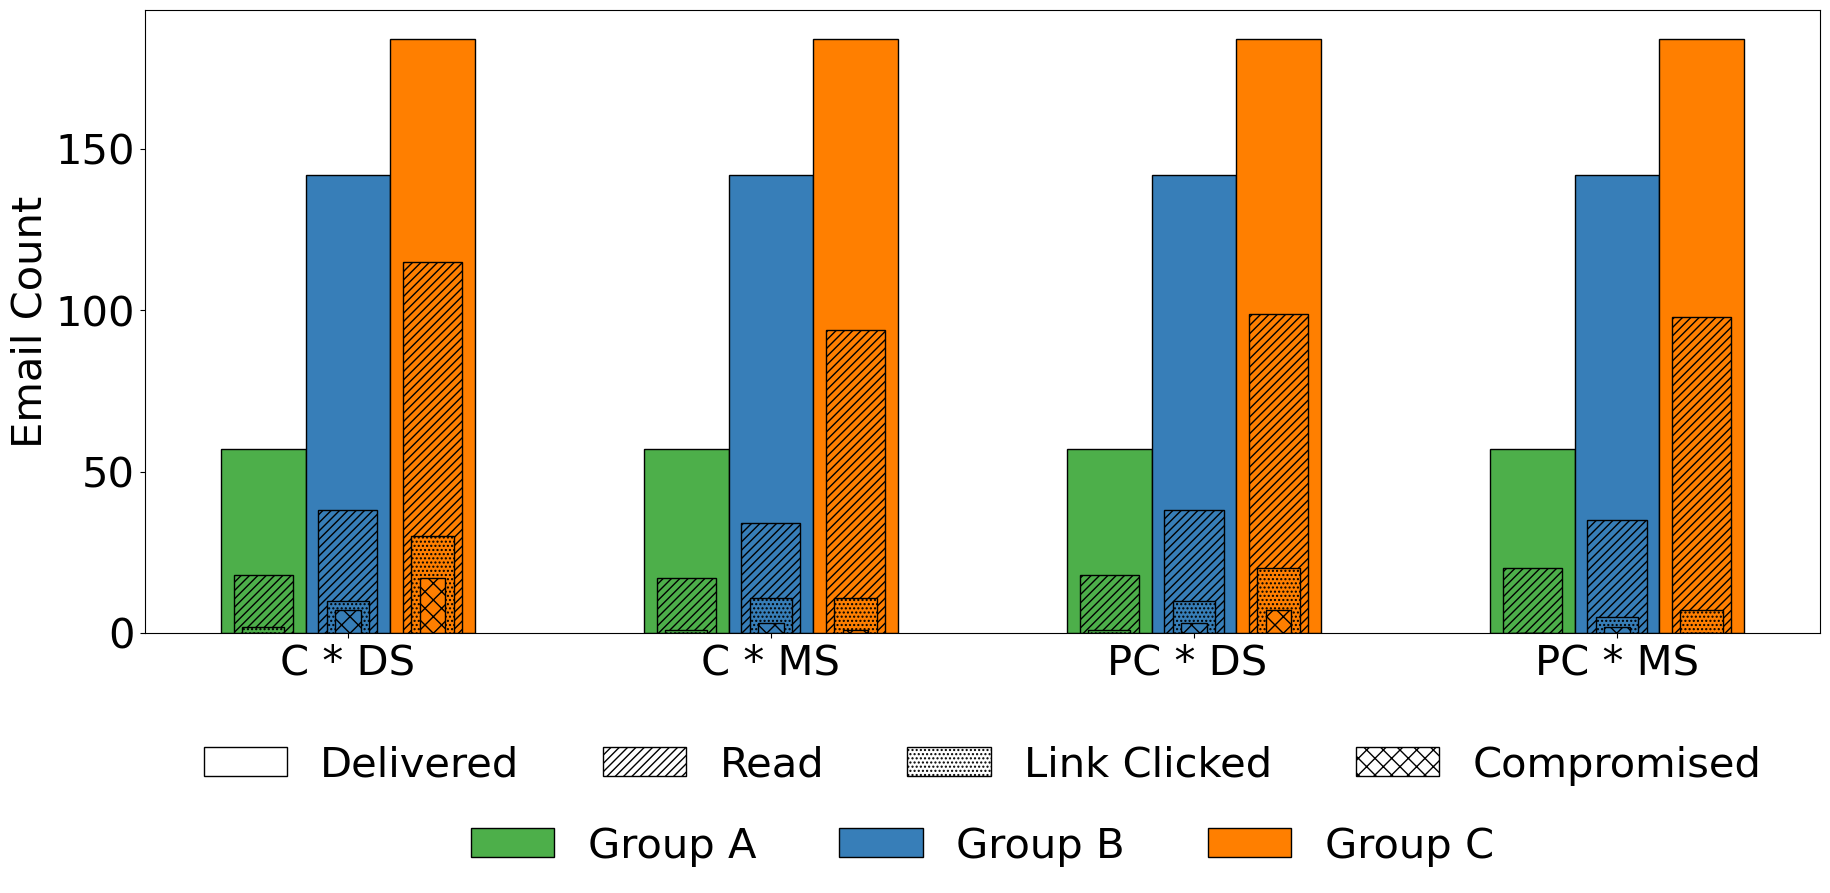

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

# --- Font embedding and subsetting ---
mp.rcParams['pdf.fonttype'] = 42   # TrueType, works well with subsetting
mp.rcParams['ps.fonttype'] = 42
#mp.rcParams['hatch.linewidth'] = 0.6  # make hatch thinner (default is 1.0)


plt.rcParams.update({'font.size': 30})

# Metric order from outer to inner (Delivered -> Read -> Link -> Cred)
metric_order = [
    'SuccessfullyDeliveredEmail',
    'MessageRead',
    'EmailLinkClicked',
    'CredSupplied'
]

# Aggregate
agg_df = mdf.groupby(['MANIPULATION', 'Group'])[metric_order].sum().reset_index()

# Plot settings
manipulations = agg_df['MANIPULATION'].unique()
groups = agg_df['Group'].unique()

# Set up bar positions
x = np.arange(len(manipulations))
bar_width = 0.2

# Colors for groups
group_colors = {
    'A': '#4daf4a',  # green
    'B': '#377eb8',  # blue
    'C': '#ff7f00'   # orange
}

# Patterns for metrics
metric_patterns = {
    'SuccessfullyDeliveredEmail': '',      # solid
    'MessageRead': '////',                 # diagonal forward
    'EmailLinkClicked': '....',            # dotted
    'CredSupplied': 'xx'                   # crosshatch
}

fig, ax = plt.subplots(figsize=(19, 10))

# Plot each group with nested bars
for i, group in enumerate(groups):
    group_data = agg_df[agg_df['Group'] == group]
    x_offset = x + (i - (len(groups) - 1) / 2) * bar_width  # center groups

    for j, manipulation in enumerate(manipulations):
        subset = group_data[group_data['MANIPULATION'] == manipulation]
        if subset.empty:
            continue

        # Get funnel values
        delivered = subset['SuccessfullyDeliveredEmail'].values[0]
        read = subset['MessageRead'].values[0]
        link = subset['EmailLinkClicked'].values[0]
        cred = subset['CredSupplied'].values[0]

        # Plot nested bars
        bottom = 0  # not stacking

        # Delivered
        ax.bar(
            x_offset[j],
            delivered,
            bar_width,
            bottom=bottom,
            color=group_colors[group],
            edgecolor='black',
            hatch=metric_patterns['SuccessfullyDeliveredEmail']
        )

        # Read
        ax.bar(
            x_offset[j],
            read,
            bar_width * 0.7,
            bottom=bottom,
            color=group_colors[group],
            edgecolor='black',
            hatch=metric_patterns['MessageRead']
        )

        # Link Clicked
        ax.bar(
            x_offset[j],
            link,
            bar_width * 0.5,
            bottom=bottom,
            color=group_colors[group],
            edgecolor='black',
            hatch=metric_patterns['EmailLinkClicked']
        )

        # Cred Supplied
        ax.bar(
            x_offset[j],
            cred,
            bar_width * 0.3,
            bottom=bottom,
            color=group_colors[group],
            edgecolor='black',
            hatch=metric_patterns['CredSupplied']
        )

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(manipulations, rotation=0)#, fontsize=28)
ax.set_ylabel('Email Count')#,fontsize=28)


# Custom legend labels
metric_labels = ['Delivered', 'Read', 'Link Clicked', 'Compromised']
group_labels = ['Group A', 'Group B', 'Group C']

# Build handles
metric_handles = [
    plt.Rectangle((0,0),1,1,facecolor='white',edgecolor='black',hatch=metric_patterns[m])
    for m in metric_order
]

group_handles = [
    plt.Rectangle((0,0),1,1,facecolor=group_colors[g],edgecolor='black')
    for g in groups
]

# Combine both metrics and groups into a single legend line
combined_handles = metric_handles + group_handles
combined_labels = metric_labels + group_labels

'''
ax.legend(
    combined_handles,
    combined_labels,
    fontsize=20,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=len(combined_handles),
    frameon=False
)
'''

leg1 = ax.legend(
    metric_handles, metric_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=len(metric_handles), frameon=False
)
ax.add_artist(leg1)

ax.legend(
    group_handles, group_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),  # slightly lower so they do not overlap
    ncol=len(group_handles), frameon=False
)

plt.tight_layout()
plt.savefig("../figures/manipulation.png", dpi=100, bbox_inches='tight', transparent=True)
plt.show()
